![logo](../../LogoLine_horizon_C3S.png)

<div class="alert alert-block alert-warning">
Please note that this repository is used for development and review, so quality assessments should be considered work in progress until they are merged into the main branch
</div>

# In-situ Wind speed completeness for climate monitoring

Production date: 10/02/2025

Produced by: Ana Oliveira and Luís Figueiredo (CoLAB +ATLANTIC)

## 🌍 Use case: Assessment of Climate Change

## ❓ Quality assessment question
* **User Question: How consistent is the 30-year wind speed climatology over time? How consistent are wind speed trends from E-OBS compared to those from reanalysis products?**

In this Use Case, we will access the E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations (henceforth, E-OBS) data from the Climate Data Store (CDS) of the Copernicus Climate Change Service (C3S) and analyse the spatial consistency of the E-OBS wind speed (WS) climatology, and its ensemble, over a given Area of Interest (AoI), as a regional example of using E-OBS in the scope of the European State of Climate [[1]](https://climate.copernicus.eu/esotc/2023). The analysis includes:
- (i) the climatology and probability density function of each alternative 30-year period available (i.e., 1981-2010, 1991-2020); 
- (ii) the linear trends of the annual mean wind speed anomaly, as used in the Winds and circulation item of the European State of Climate [[1]](https://climate.copernicus.eu/esotc/2023);
- (iii) the corresponding maps, to disclose where the Extreme Wind Days Index is changing the most.

## 📢 Quality assessment statement

```{admonition} These are the key outcomes of this assessment
:class: note
* Daily wind speed (WS) from E-OBS offers complete temporal-spatial coverage over the AoI, showing significative inter-annual variability and significant trends, consistent with findings reported in the literature  [[8]](https://doi.org/10.1002/joc.8191)[[9]](https://doi.org/10.5194/asr-20-91-2023).
* According to [[9]](https://doi.org/10.5194/asr-20-91-2023), E-OBS demonstrates better accuracy in capturing local wind patterns, with E-OBS showing good agreement in regions with dense station networks and a better depiction of wind stilling trends. 
* As is the case with the previous studies focusing on the other E-OBS variables [[4]](https://doi.org/10.1029/2017JD028200)[[5]](https://doi.org/10.1002/JOC.7269)[[6]](https://doi.org/10.1029/2009JD011799)[[7]](https://doi.org/10.1029/2020EA001633)[[8]](https://doi.org/10.1002/joc.8191)[[9]](https://doi.org/10.5194/asr-20-91-2023), this dataset tends to show a superior level of local detail, especially in regions with dense data.
* The findings thus support that E-OBS is a reliable source of climate data for local applications, especially in locations where geographic factors may lead to more localized wind patterns, and when focusing on depicting wind stilling or extremes. Furthermore, by offering a tuned ensemble spread, E-OBS helps users to determine the uncertainty of their added-value applications, providing an efficient way of catering for uncertainty of their results.  Indeed, as the density and location of all input stations are not fully available, the ensemble spread should be used as a complementary indicator of the confidence level and variability of WS.
```

![EOBS_UQ5_WS_climatology_annual.png](EOBS_UQ5_WS_climatology_annual.png)
```{note}
Figure A. Annual Mean Wind Speed Climatology: comparison between the 1981-2010 and 1991-2020 periods.
```

## 📋 Methodology
This notebook provides an assessment of the wind speed completeness for climate monitoring from **E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations dataset**, [E-OBS](https://cds.climate.copernicus.eu/datasets/insitu-gridded-observations-europe?tab=overview). It achieves this by comparing the two 30-year climatological periods of 1981-2010 and 1991-2020. In particular, spatial patterns of annual and seasonal mean, along with the ensemble spread, are examined and displayed for each period (calculated for each grid cell). Additionally, spatially-weighted trend mean annual values are analysed and presented using a Mann-Kendall and Sen's slope linear trend estimation, over a given Area of Interest (AoI).

The analysis and results follow the next outline:

**[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1)**
 * [](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.1)
 * [](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.2)
 * [](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.3)
 * [](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.4)
 * [](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.5)

**[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-2)**
 * [](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-2.1)
 * [](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-2.2)

**[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-3)**
 * [](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-3.1)
 * [](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-3.2)

**[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-4)**
 * [](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-4.1)
 * [](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-4.2)

**[](insitu_insitu-gridded-observations-europe_completeness_q05:code-section-5)**

## 📈 Analysis and results

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1)=  
### 1. Define the AoI, search and download E-OBS

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.1)=  
#### 1.1. Import required packages
We will be working with data in NetCDF format. To best handle this data we will use libraries for working with multidimensional arrays, in particular Xarray. We will also need libraries for plotting and viewing data, in this case we will use Matplotlib and Cartopy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymannkendall as mk
import scipy.stats
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download, plot

plt.style.use("seaborn-v0_8-notebook")

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.2)=  
#### 1.2. Data overview

To search for data, visit the CDS website: http://cds.climate.copernicus.eu. Here you can search for 'in-situ observations' using the search bar. The data we need for this tutorial is the E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations. This catalogue entry provides a daily gridded dataset of historical meteorological observations, covering Europe (land-only), from 1950 to the present. This data is derived from in-situ meteorological stations, made available through the European Climate Assessment & Dataset (ECA&D) project, as provided by National Meteorological and Hydrological Services (NMHSs) and other data-holding institutes. 

E-OBS comprises a set of spatially continuous Essential Climate Variables (ECVs) from the Surface Atmosphere, following the Global Climate Observing System (GCOS) convention, provided as the mean and spread of the spatial prediction ensemble algorithm, at regular latitude-longitude grid intervals (at a 0.1° and 0.25° spatial resolution), and covering a long time-period, from 1 January 1950 to present-day. In addition to the land surface elevation, E-OBS includes daily air temperature (mean, maximum and minimum), precipitation amount, wind speed, sea-level pressure and shortwave downwelling radiation. 

The E-OBS version used for this Use Case, E-OBSv28.0e, was released in October 2023 and its main difference from the previous E-OBSv27.0e is the inclusion of new series and some corrections for precipitation stations.

Having selected the correct dataset, we now need to specify what product type, variables, and temporal and geographic coverage we are interested in. In this Use Case, the ensemble mean of daily mean wind speed (FG) will be used, considering the last version available (v28.0e). These can all be selected in the “Download data” tab from the CDS. In this tab a form appears in which we will select the following parameters to download, for example:

- Product Type: Ensemble mean  
- Variable: daily mean wind speed
- Grid resolution: 0.25  
- Period: Full period  
- Version: 28.0e  
- Format: Zip file (.zip)

At the end of the download form, select `Show API request`. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook …

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.3)=  
#### 1.3. Download and prepare E-OBS data

… having copied the API request to a Jupyter Notebook cell, running it will retrieve and download the data you requested into your local directory. However, before you run it, the `terms and conditions` of this particular dataset need to have been accepted directly at the CDS website. The option to view and accept these conditions is given at the end of the download form, just above the `Show API request` option. In addition, it is also useful to define the time period and AoI parameters and edit the request accordingly, as exemplified in the cells below. Furthermore, in this use case, the following 30-year climatological periods are considered, as per the guidelines from WMO [[3]](https://library.wmo.int/index.php?lvl=notice_display&id=20130):

- 1981 to 2010
- 1991 to 2020

In [2]:
# Define climatology periods - ToI
years_start = [1981, 1991]
years_stop = [2010, 2020]
colors = [ "gold", "red"]
assert len(years_start) == len(years_stop) == len(colors)

# Define region of interest - AoI
area = [44, -10, 36, 1]  # N, W, S, E
assert len(area) == 4

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.4)=  
#### 1.4. Define the required functions

To proceed with the analysis, it is useful to define some helper functions.
- The `dayofyear_reindex` function calculates the day of the year and adds it as an additional coordinate, along with the climatological `periods` established earlier
- The `spatial_weighted_mean` function extracts the spatial-weighted mean over the selected domains, accounting for the latitudinal dependence of the grid area and size which will be used for the analysis.
- The `make_statistics_dataframe` function converts the standard descriptive statistics of the spatial weighted mean results over the time dimension, considering the climatological periods chosen before
- The `compute_hist` function converts the data into histograms
- The `plot_pdf` function plots the data into Probability Density Functions (PDFs) format

In [3]:
# Define transform function to reduce downloaded data
def dayofyear_reindex(ds, years_start, years_stop):
    # 15-day rolling mean
    ds_rolled = ds.rolling(time=15, center=True).mean()

    # Extract periods
    datasets = []
    for year_start, year_stop in zip(years_start, years_stop):
        period = f"{year_start}-{year_stop}"
        ds_masked = ds_rolled.where(
            (ds_rolled["time"].dt.year >= year_start)
            & (ds_rolled["time"].dt.year <= year_stop),
            drop=True,
        )
        datasets.append(
            ds_masked.groupby("time.dayofyear").mean().expand_dims(period=[period])
        )
    ds_dayofyear = xr.merge(datasets)

    # Add season (pick any leap year)
    season = xr.DataArray(
        pd.to_datetime(ds_dayofyear["dayofyear"].values - 1, unit="D", origin="2008"),
    ).dt.season
    return ds_dayofyear.assign_coords(season=("dayofyear", season.values))

def spatial_weighted_mean(ds):
    ds = ds.resample(time="1D").mean(keep_attrs=True)
    return diagnostics.spatial_weighted_mean(ds)


# Statistics dataframe
def make_statistics_dataframe(da):
    dims = set(da.dims) - {"period"}
    return pd.DataFrame.from_dict(
        {
            "period": da["period"],
            "number": da.notnull().sum(dims),
            "mean": da.mean(dims),
            "maximum": da.max(dims),
            "minimum": da.min(dims),
            "st.deviation": da.std(dims),
        }
    )

# Histogram
def compute_hist(da, **kwargs):
    hist, bin_edges = np.histogram(da, **kwargs)
    da_hist = xr.DataArray(hist, coords={"bins": (bin_edges[1:] + bin_edges[:-1]) / 2})
    da_hist["bins"].attrs = da.attrs
    da_hist.attrs["long_name"] = "Probability Density"
    return da_hist

# Probability density function
def plot_pdf(da, colors, bins=None, **kwargs):
    if bins is None:
        bins = np.linspace(da.min().values, da.max().values, 50)

    dims = []
    for key in {"hue", "row", "col"} & set(kwargs):
        dims.append(kwargs[key])
    da = da.groupby(dims).map(compute_hist, bins=bins, density=True)
    with plt.rc_context(
        {
            "axes.prop_cycle": plt.cycler(color=colors),
            "axes.grid": True,
        }
    ):
        return da.plot(**kwargs)

Having defined the helper functions and download parameters, we will proceed with downloading the E-OBS dataset. We will also download the ERA5 reanalysis, for comparison purposes.

In [4]:
# Define request
collection_id = "insitu-gridded-observations-europe"
request = {
    "variable": ["wind_speed"],
    "grid_resolution": "0_25deg",
    "period": "full_period",
    "version": ["28_0e"],
    "area": area,
}


collection_id_era5 = "reanalysis-era5-single-levels"

request_era5 = {
    "product_type": ["ensemble_mean"],
    "variable": ["10m_u_component_of_wind", "10m_v_component_of_wind"],
    "time": [f"{hour:02d}:00" for hour in range(0, 24, 3)],
    "area": area,
}

start = f"{min(years_start)}-01"
stop = f"{max(years_stop)}-12"
request_era5 = download.update_request_date(request_era5, start, stop)

In [5]:
# Periods
dataarrays = []
for reduction in ("mean", "spread"):
    print(f"{reduction=}")
    da = download.download_and_transform(
        collection_id,
        request | {"product_type": f"ensemble_{reduction}"},
        transform_func=dayofyear_reindex,
        transform_func_kwargs={"years_start": years_start, "years_stop": years_stop},
    )["fg"]
    dataarrays.append(da.rename(reduction))
    da.attrs["long_name"] += f" {reduction}"
ds_periods = xr.merge(dataarrays)

# Timeseries
da_eobs = download.download_and_transform(
    collection_id,
    request | {"product_type": "ensemble_mean"},
    transform_func=diagnostics.spatial_weighted_mean,
)["fg"]
da_eobs = da_eobs.sel(time=slice(start, stop))

reduction='mean'


100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


reduction='spread'


100%|██████████| 1/1 [00:00<00:00, 44.59it/s]


In [6]:
# Inspect the E-OBS data structure
da_eobs

<xarray.DataArray 'fg' (time: 14610)> Size: 117kB
dask.array<getitem, shape=(14610,), dtype=float64, chunksize=(14610,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 117kB 1981-01-01 1981-01-02 ... 2020-12-31
Attributes:
    standard_name:  wind_speed
    long_name:      Ensemble mean wind speed
    units:          m/s

In [7]:
# Download and transform the ERA5 dataset
da_era5 = download.download_and_transform(
    collection_id_era5,
    request_era5,
    transform_func=diagnostics.spatial_weighted_mean,
    backend_kwargs={"time_dims": ["valid_time"]},
    chunks={"year": 1},
    n_jobs=2,
)[['u10', 'v10']]

100%|██████████| 40/40 [00:00<00:00, 53.98it/s]


In [8]:
# Compute wind speed from ERA5 u10 and v10
da_era5_wind_speed = np.sqrt(da_era5['u10']**2 + da_era5['v10']**2)

da_era5_wind_speed

<xarray.DataArray (time: 116880)> Size: 935kB
dask.array<sqrt, shape=(116880,), dtype=float64, chunksize=(2928,), chunktype=numpy.ndarray>
Coordinates:
    realization  int64 8B 0
    surface      float64 8B 0.0
  * time         (time) datetime64[ns] 935kB 1981-01-01 ... 2020-12-31T21:00:00

In [9]:
# Resample ERA5 to match the E-OBS daily temporal resolution
da_era5_wind_speed_mean = da_era5_wind_speed.resample(time="1D").mean(keep_attrs=True)

da_era5_wind_speed_mean

<xarray.DataArray (time: 14610)> Size: 117kB
dask.array<groupby_nanmean, shape=(14610,), dtype=float64, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
    realization  int64 8B 0
    surface      float64 8B 0.0
  * time         (time) datetime64[ns] 117kB 1981-01-01 ... 2020-12-31

In [10]:
# Rename and subset the ERA5 wind speed
da_era5_wind_speed.name = "wind_speed"

da_era5_subset = da_era5_wind_speed.sel(
    time=slice('1980-01-01', '2020-12-31')).resample(time='1D').mean()

# Inspect the subset
da_era5_subset

<xarray.DataArray 'wind_speed' (time: 14610)> Size: 117kB
dask.array<groupby_nanmean, shape=(14610,), dtype=float64, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
    realization  int64 8B 0
    surface      float64 8B 0.0
  * time         (time) datetime64[ns] 117kB 1981-01-01 ... 2020-12-31

In [11]:
# Subset the E-OBS wind speed
da_eobs_subset = da_eobs.sel(
    time=slice('1980-01-01', '2020-12-31')).resample(time='1D').mean()
    
# Inspect the subset
da_eobs_subset

<xarray.DataArray 'fg' (time: 14610)> Size: 117kB
dask.array<groupby_nanmean, shape=(14610,), dtype=float64, chunksize=(14610,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 117kB 1981-01-01 1981-01-02 ... 2020-12-31
Attributes:
    standard_name:  wind_speed
    long_name:      Ensemble mean wind speed
    units:          m/s

In [12]:
# Concatenate datasets along the "product" dimension
da_timeseries = xr.concat(
    [
        da_era5_subset.expand_dims(product=["ERA5"]),
        da_eobs_subset.expand_dims(product=["EOBS"]),
        
       
    ],
    "product",
)
# Inspect the resulting time series
da_timeseries

<xarray.DataArray 'wind_speed' (product: 2, time: 14610)> Size: 234kB
dask.array<concatenate, shape=(2, 14610), dtype=float64, chunksize=(1, 366), chunktype=numpy.ndarray>
Coordinates:
  * product      (product) object 16B 'ERA5' 'EOBS'
    realization  int64 8B 0
    surface      float64 8B 0.0
  * time         (time) datetime64[ns] 117kB 1981-01-01 ... 2020-12-31


(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-1.5)=  
#### 1.5. Inspect and view the data
Now that we have downloaded the data, we can inspect it. We have requested the data in NetCDF format. This is a commonly used format for array-oriented scientific data. To read and process this data we will make use of the Xarray library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient. We will read the data from our NetCDF file into an xarray.Dataset.

To understand better the E-OBS data structure and check the aggregated Daily Mean Wind Speed (WS), we will first need to retrieve the WS variable from the 2 multidimensional netCDF data structures and calculate the descriptive statistics.

In [13]:
# Print the xarray data structure
ds_periods

<xarray.Dataset> Size: 8MB
Dimensions:    (longitude: 44, latitude: 32, dayofyear: 366, period: 2)
Coordinates:
  * longitude  (longitude) float64 352B -9.875 -9.625 -9.375 ... 0.625 0.875
  * latitude   (latitude) float64 256B 36.12 36.38 36.62 ... 43.38 43.62 43.88
  * dayofyear  (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
  * period     (period) <U9 72B '1981-2010' '1991-2020'
    season     (dayofyear) <U3 4kB dask.array<chunksize=(366,), meta=np.ndarray>
Data variables:
    mean       (period, dayofyear, latitude, longitude) float32 4MB dask.array<chunksize=(2, 366, 32, 44), meta=np.ndarray>
    spread     (period, dayofyear, latitude, longitude) float32 4MB dask.array<chunksize=(2, 366, 32, 44), meta=np.ndarray>
Attributes:
    standard_name:  wind_speed
    long_name:      Ensemble mean wind speed mean
    units:          m/s

We can see from the data structure that our information is already stored in a four-dimensional array with two data variables, corresponding to the RR 'mean' and ensemble 'spread', with dimensions: 5 time periods in 'period', 366 days in 'dayofyear', 32 steps in 'latitude', and 44 steps in 'longitude'. This is because the toolbox provides an already post-processed output with the values calculated using the transformer function. This reduces the amount of data to be processed and stored locally, facilitating the next steps. Let's inspect the data and compute the basic descriptive statistics of each period and print them in tabular form.

In [14]:
# Inspect RR statistics
make_statistics_dataframe(ds_periods["mean"])

,period,number,mean,maximum,minimum,st.deviation
0,1981-2010,323910,2.414002,4.655022,1.056952,0.422317
1,1991-2020,323910,2.365694,4.479756,1.110083,0.425223


In [15]:
# Inspect RR spread statistics
make_statistics_dataframe(ds_periods["spread"])

,period,number,mean,maximum,minimum,st.deviation
0,1981-2010,323910,3.267238,8.330712,0.677556,0.842695
1,1991-2020,323910,3.105064,7.508223,0.634844,0.859216


As we can see from the descriptive statistics, the most recent climatological period is characterized by very similar mean and maximum wind speeds - in the Iberian Peninsula, the mean annual WS between 1991 and 2020 is 2.36m/s, less than 0.10m/s below the equivalent in 1981 to 2010, while the annual maximum WS has a vary small decrease by less than 0.20m/s. The WS spread also decreased, pointing to an increase in the confidence level of the product values, albeit of less than 0.50m/s change. To further explore these findings, let's compare E-OBS and ERA5 over the AoI.

To do this, we need to create a set of weights based on latitude values. The weighted method is used to create a weighted dataset. Any subsequent aggregation operations (such as mean, sum, etc.) will take these weights into account. These weights can be used to account for the varying area of grid cells in latitude-longitude grids to ensure that calculations properly account for varying areas represented by grid cells at different latitudes.

Now we will proceed with merging WS from both datasets.

In [16]:
era5 = da_timeseries.where(da_timeseries['product'] == 'ERA5', drop=True)
eobs = da_timeseries.where(da_timeseries['product'] == 'EOBS', drop=True)

print("ERA5 shape:", era5.shape)
print("EOBS shape:", eobs.shape)

ERA5 shape: (1, 14610)
EOBS shape: (1, 14610)


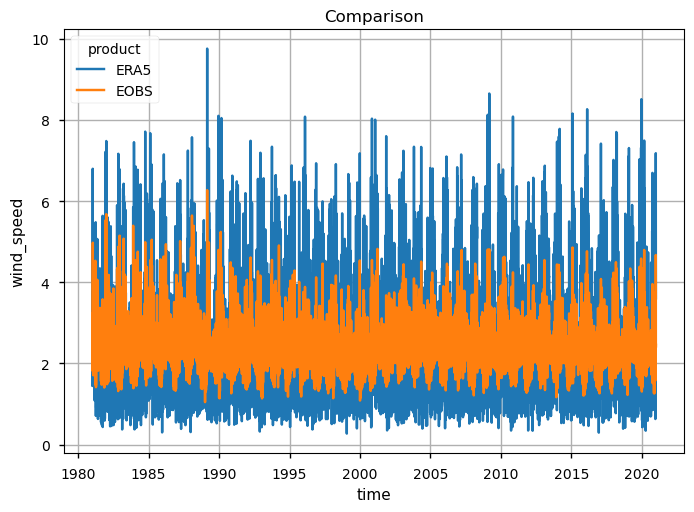

In [17]:
# Plot an overall comparison between both data products
da_timeseries.plot(hue="product")
plt.title("Comparison")
plt.grid()

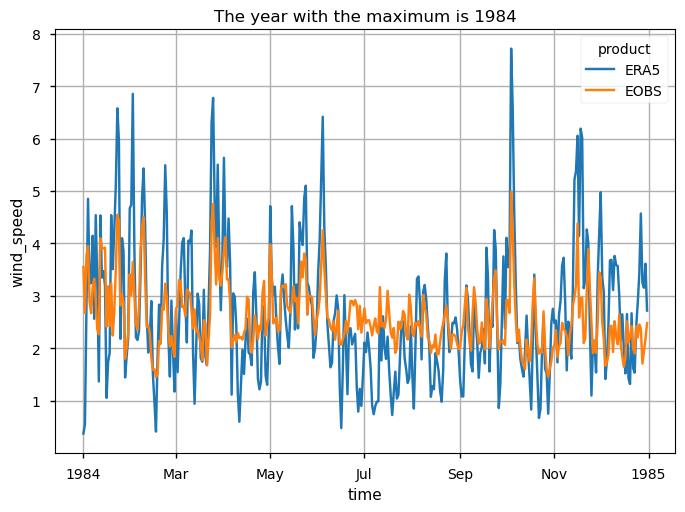

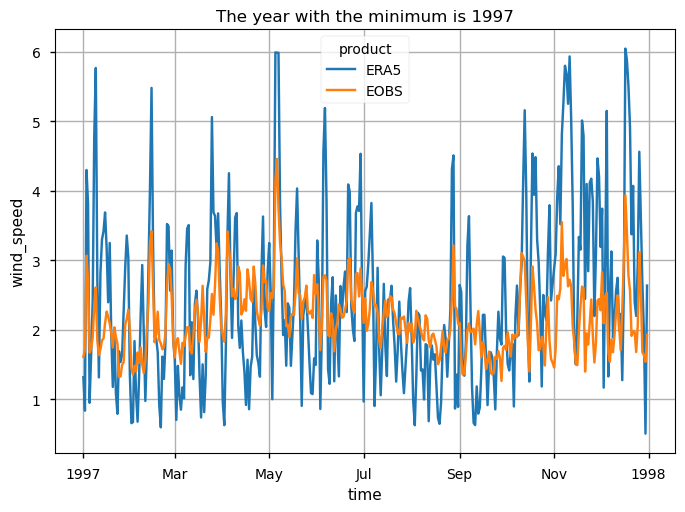

In [18]:
# Plot a comparison between the years with maximum and minimum annual precipitation
da_timeseries_yearly = da_timeseries.sel(product="EOBS").groupby("time.year").mean()
zooms = {
    "maximum": int(da_timeseries_yearly.idxmax("year").squeeze()),
    "minimum": int(da_timeseries_yearly.idxmin("year").squeeze()),
}
for label, year in zooms.items():
    da = da_timeseries.sel(time=str(year))
    da.plot(hue="product")
    plt.grid()
    plt.title(f"The year with the {label} is {year}")
    plt.show()

These time series plots show that both data products have overall similar average variability but contrasting absolute WS ranges in terms of the extreme values, with E-OBS showing very few cases of daily mean WS > 6m/s. Furthermore, the same pattern is found when specific years of minimum and maximum annual mean values are analysed: 1984 is shown to have several days surpassing 4m/s WS, whereas in 1997 there was only one day in which this value was reached (in E-OBS). ERA5 shows average agreement, with much greater variability and more extreme maximum and minimum values.

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-2)=  

### 2. Analyse the annual climatology for alternative 30-year periods


(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-2.1)=
#### 2.1. Calculate and plot annual mean WS maps and PDFs


With the subsets per period already created, now it is time to calculate the climatological mean over each Time of Interest (ToI). Here, the calculation of the annual mean WS map for each day of the year (DOY) is done, while considering a 15-days Simple Moving Average (SMA), in order to smooth the inter-days varibility.

To complement the statistics and the maps of the annual mean RR over the Iberian Peninsula, it is also useful to consider the full distribution of the values of this variable, which is a function of space and time. The PDF is useful to this effect, as is shows how frequent certain values are in a given period. To this effect, we will use the helper functions defined earlier to calculate the climatology and the probability density function. In the following plot, we compare the PDF across the two climatology periods to emphasise how these frequencies have been changing.

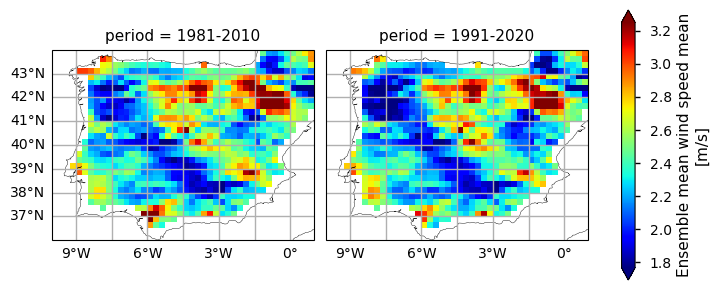

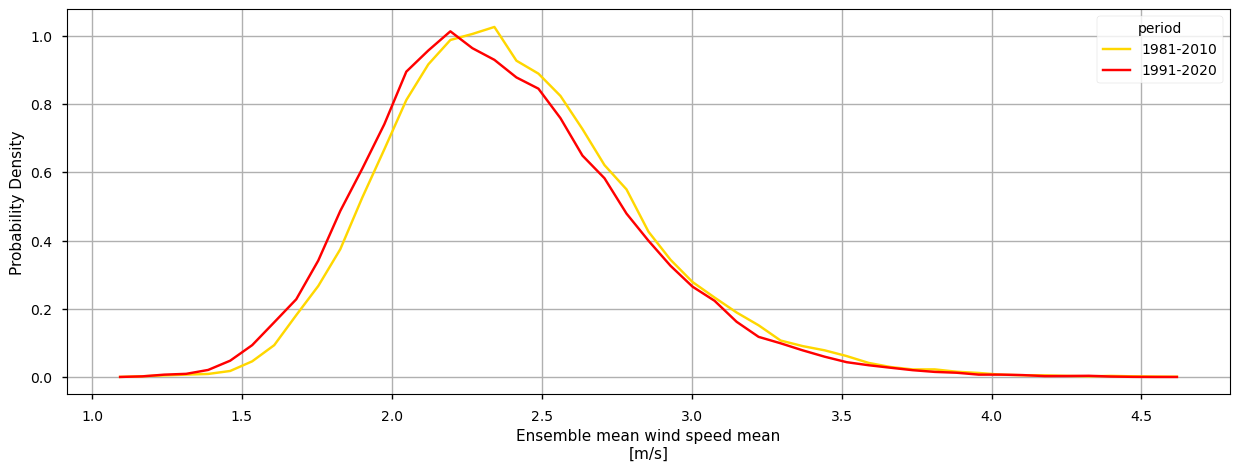

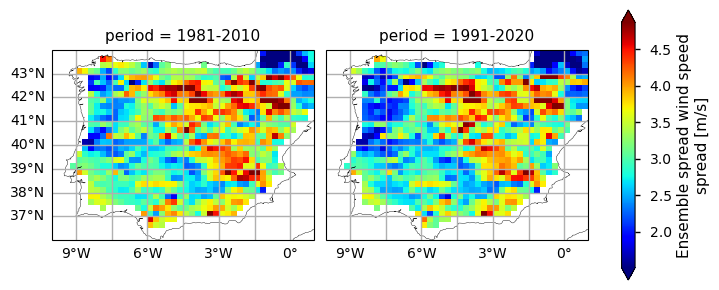

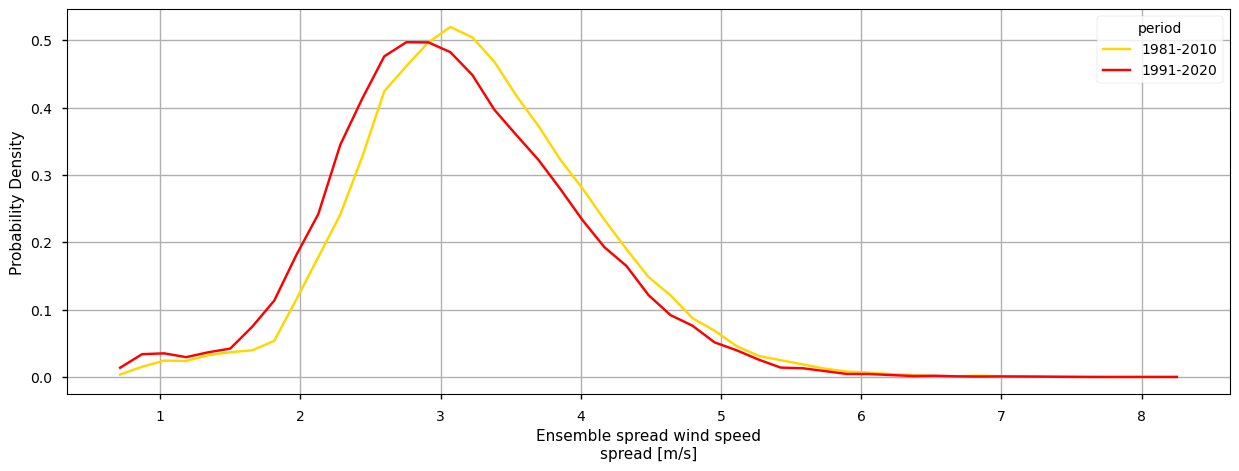

In [19]:
# Plot the PDF and climatology maps of RR
maps_kwargs = {"col": "period", "cmap": "jet", "robust": True}
pdf_kwargs = {"colors": colors, "hue": "period", "figsize": [15, 5]}
for da in ds_periods.data_vars.values():
    plot.projected_map(da.mean("dayofyear", keep_attrs=True), **maps_kwargs)
    plt.show()

    plot_pdf(da, **pdf_kwargs)
    plt.show()

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-2.2)=  
#### 2.2. Inspect the results

The WS climatology maps already disclose some spatial patterns of the annual statistics summarised before: for instance, the decrease of WS is more pronounced in north-western and south-eastern coastal parts of the AoI, compared to the inland region. Furthermore, as shown in the WS spread maps, these areas are characterised by a lower WS range - this suggests that there is a higher confidence in the gridded values over this region, possibly attributable to a lower regional WS variability.  

In addition, the PDF plots show that a gradual shift in the distribution of WS can be observed over time. Particularly from the earlier time period (1981-2010) represented in yellow, to the more recent periods (1991-2020) in red, there is an overall very slight shift towards lower WS values, by less than 0.1m/s. From the rainfall spread PDF plot, it is also shown that the spread range is becoming more concentrated around lower values (reducing by, on average, 0.5m/s). This agrees with the mean climatological values found before, suggesting that there is an overall statistical distribution shift.

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-3)=  

### 3. Analyse the seasonal climatology for alternative 30-year periods


(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-3.1)=
#### 3.1. Calculate and plot seasonal mean WS maps and PDFs

To take the analysis further, it is also useful to proceed with the calculation of seasonal climatologies. In this case the ToI will consider all the seasons of the year, i.e., Winter (Decembre, January, and February - DJF), Spring (March, April, May - MAM), Summer (June, July, and August - JJA) and Autumn (September, October, November - SON). In both cases, we will plot their PDFs and maps for all the two periods.

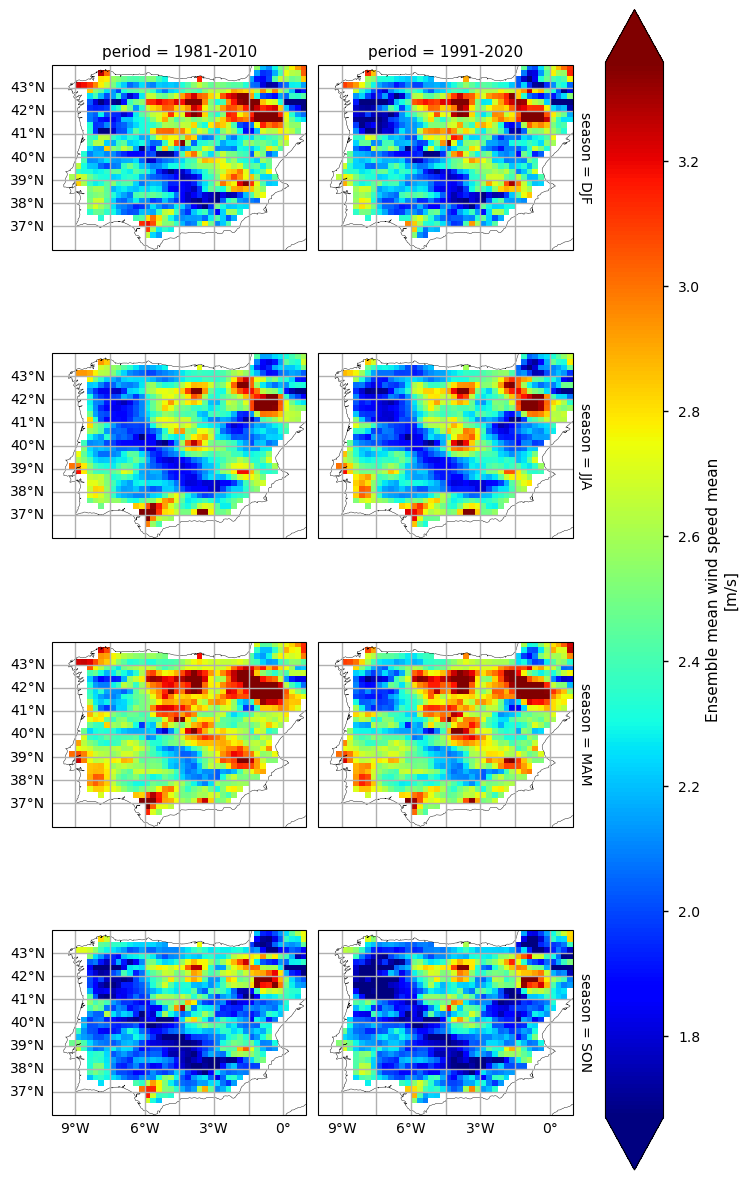

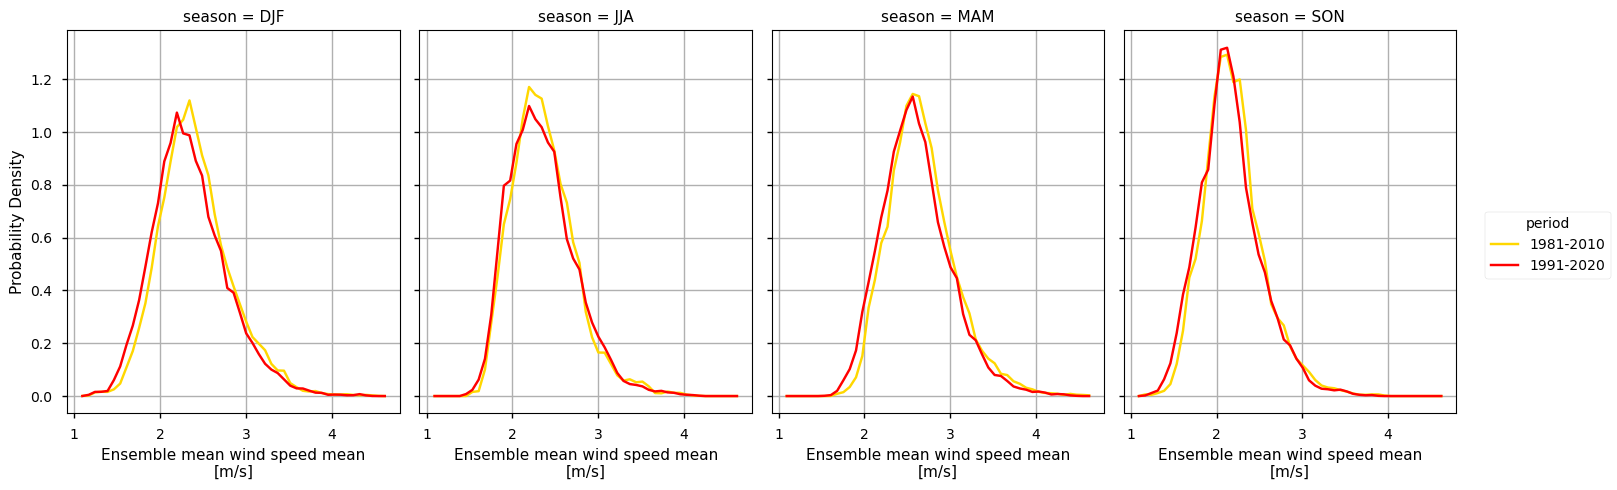

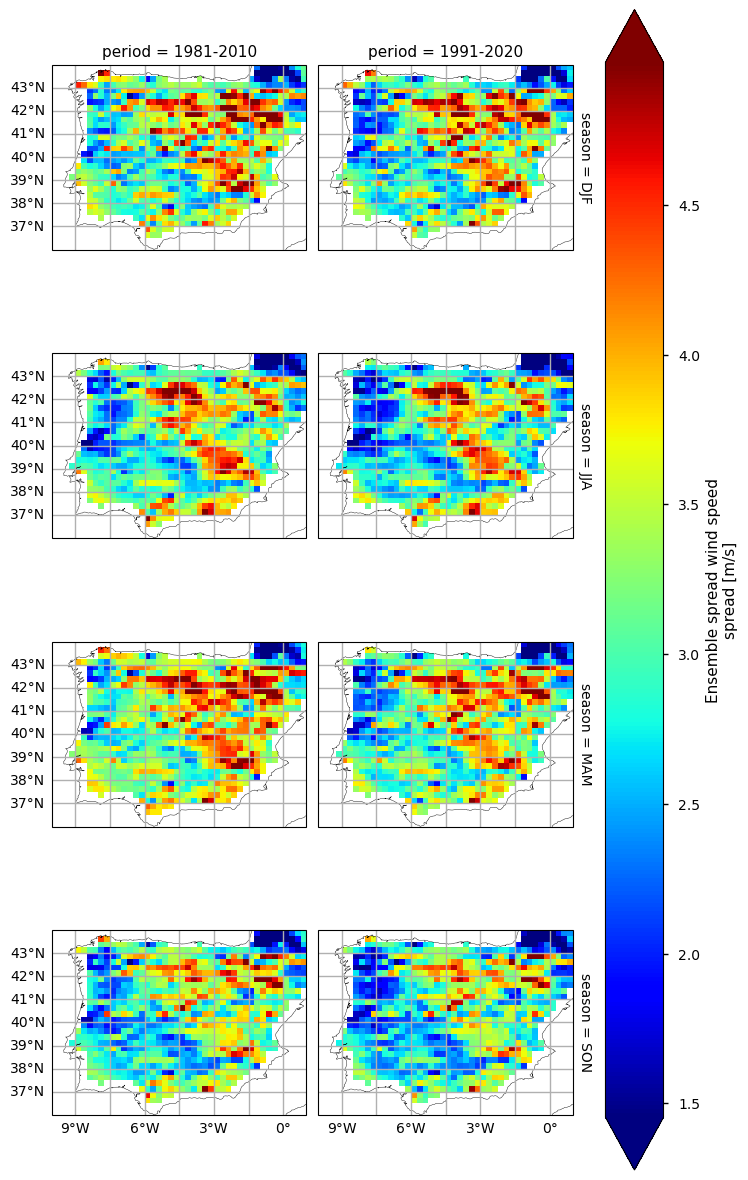

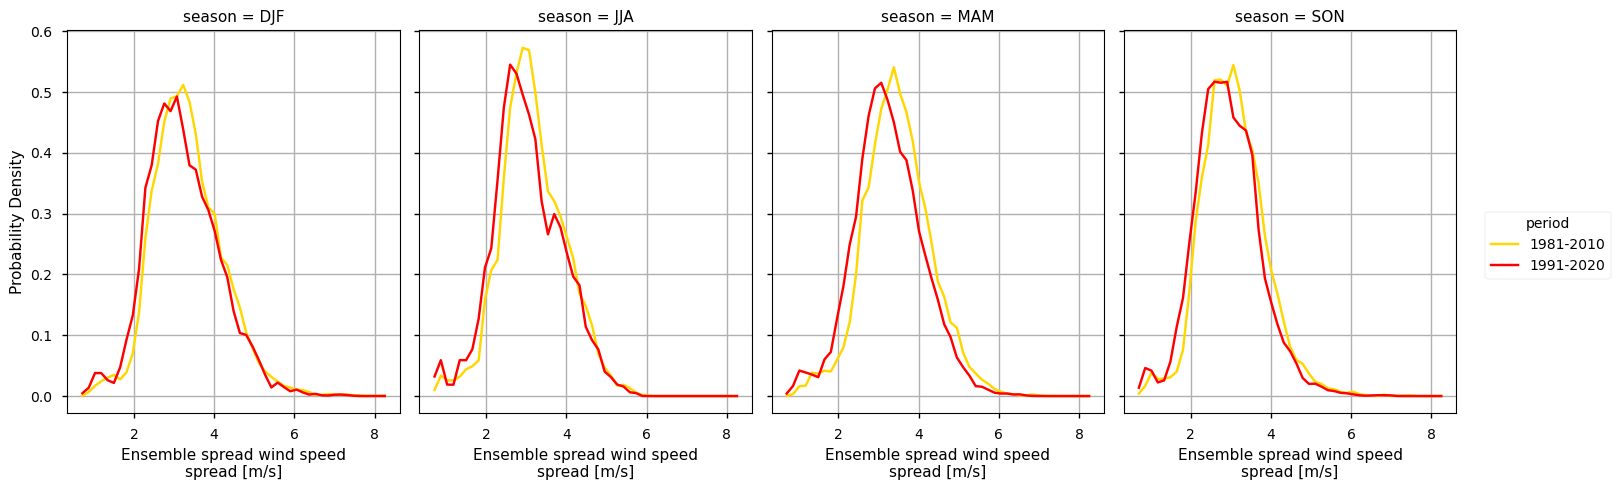

In [20]:
for da in ds_periods.data_vars.values():
    plot.projected_map(
        da.groupby("season").mean(keep_attrs=True),
        row="season",
        **maps_kwargs,
    )
    plt.show()

    plot_pdf(da, col="season", **pdf_kwargs)
    plt.show()

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-3.2)=  
#### 3.2. Inspect the results
In the above plots, we can see a dissimilar spatial pattern between seasonal changes: overall, the higher WS values are centred over the western inland areas of the Iberian Peninsula (in Spain), often surpassing 2.4 m/s, with maximum values surpassing 3.2 m/s during the Spring months, in both climatological periods. By contrast, the Autumn has the lowest average WS values, often below 1.8 m/s. This indicates that transition seasons have the most extreme values concerning wind patterns. In addition, there are smaller regions in the South-western region of the Iberian Peninsula which are characterised by higher WS values - that is the case in the South of Portugal (Alentejo and Algarve), and certain coastal locations in the South of Spain (Gibraltar, Málaga and Murcia).

In complement, the ensemble spread maps illustrate the confidence level and variability that these average values may represent - unlike the climatology mean, the WS spread has a weak seasonality component. Nevertheless, the spatial pattern of the WS ensemble spread is directly proportional to the overall WS pattern, i.e., greater spread exists where WS values are higher.

While the PDF results complement these findings, the shift towards lower WS is very slight, when comparing the most recent and earlier period, and all seasons are in agreement with the annual PDF plot.

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-4)=  
### 4. Analyse the Extreme Wind Days Index over the AoI

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-4.1)=  
#### 4.1. Calculate the annual frequency of positive Extreme Wind Days index and the linear trend
To take the analysis one step further, we will calculate the amount of days when WS surpass the 98th percentile threshold over a given reference period. Here, we will use the most recent climatology referred earlier (i.e., 1991-2020). Also called as the 'Extreme Wind Days Index', this index is part of the Severe Storm hazard type of the Wind category of the classification, as described in the European Climate Data Explorer (ECDE). More information on this index can be consulted in the ECDE website [[2]](https://climate-adapt.eea.europa.eu/en/knowledge/european-climate-data-explorer) or its confluence page on indicators.

In [21]:
# Ensure 'dayofyear' coordinate exists
da_timeseries = da_timeseries.assign_coords(dayofyear=da_timeseries['time'].dt.dayofyear)

# Rechunk the dataset to ensure it works with quantile calculations
da_timeseries = da_timeseries.chunk({'time': -1})  # This ensures time is a single chunk

# Compute the 98th percentile per day of the year
percentile_98 = da_timeseries.groupby("dayofyear").quantile(0.98, dim="time", method="nearest")

# Define the window size (365 days)
window_size = 15
half_window = window_size // 2

# Pad the data at the edges using the first and last 7 days
padded_percentile_98 = xr.concat([percentile_98.isel(dayofyear=slice(-half_window, None)), percentile_98, percentile_98.isel(dayofyear=slice(None, half_window))], dim='dayofyear')

# Apply a 15-day rolling mean for smoothing
smoothed_percentile_98 = padded_percentile_98.rolling(dayofyear=15, center=True, min_periods=15).mean()

# Remove the padded data
smoothed_percentile_98 = smoothed_percentile_98.isel(dayofyear=slice(half_window, -half_window))

# Map smoothed percentiles back to time using dayofyear
smoothed_threshold = smoothed_percentile_98.sel(dayofyear=da_timeseries['time'].dt.dayofyear)

# Compute exceedance (ensuring no dayofyear remains)
exceedance = da_timeseries > smoothed_threshold

In [22]:
# Calculate and plot the annual time series of Extreme Wind Days Index for E-OBS and ERA5, along with their linear trend
df = (exceedance).groupby("time.year").sum().to_pandas()

# Ensure columns are integers (years)
df.columns = df.columns.astype(int)

# Inspect the dataset structure
df

year,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
product,,,,,,,,,,,,,,,,,,,,,
ERA5,22,11,12,17,15,11,12,8,15,11,...,6,12,20,13,12,20,15,8,23,14
EOBS,30,20,29,35,19,34,28,20,19,9,...,5,12,5,9,7,11,6,6,14,8


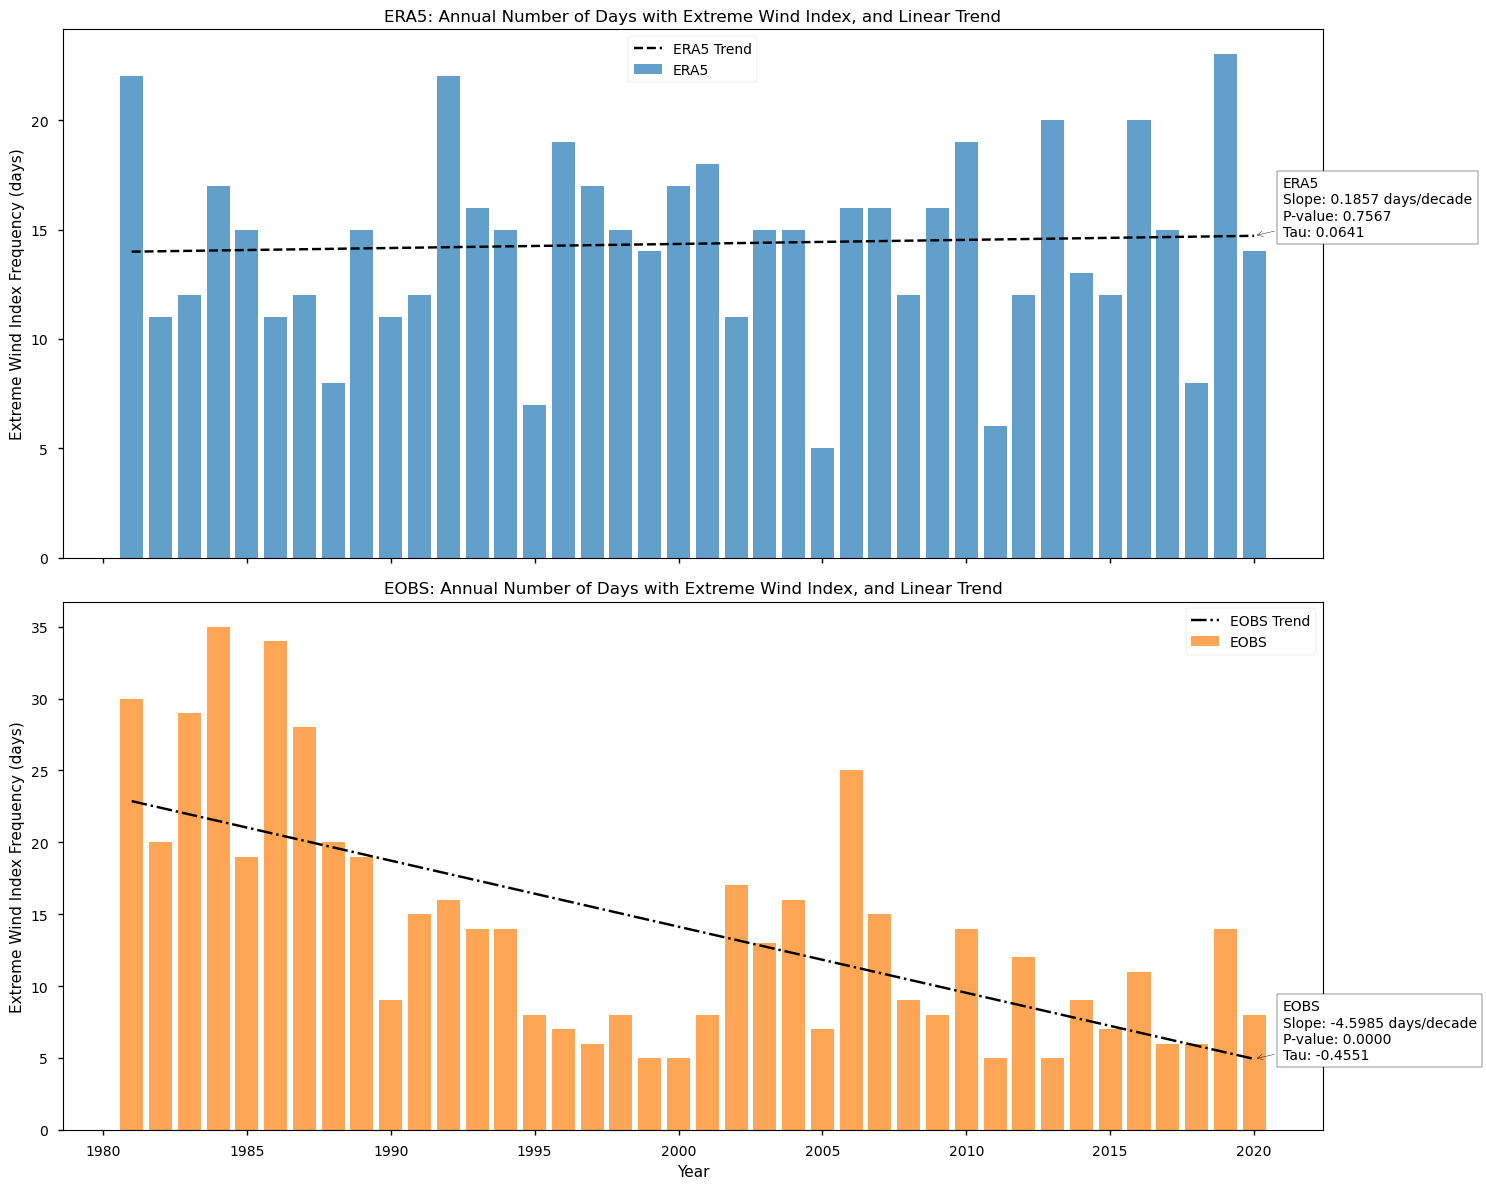

In [23]:
# Get the default color cycle and pick ERA5's and EOBS's default colors.
default_colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
era5_color = default_colors[0]  # First color for ERA5
eobs_color = default_colors[1]  # Second color for EOBS

# Transpose DataFrame: years as index, products as columns
df_transposed = df.T  # Now, df_transposed.index are years, and columns are ['ERA5', 'EOBS']

# Create the figure with 2 subplots (one for each product)
fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Loop over each product (ERA5, EOBS)
for i, product in enumerate(df_transposed.columns):
    ax = axes[i]  # Select the corresponding subplot
    ts = df_transposed[product]  # Select the time series
    years = ts.index.astype(int)  # Ensure years are treated as integers
    y_values = ts.values

    # Assign colors and line styles
    if product == "ERA5":
        data_color = era5_color
        trend_linestyle = "--"
    elif product == "EOBS":
        data_color = eobs_color
        trend_linestyle = "-."
    else:
        data_color = "gray"  # Default for unexpected products
        trend_linestyle = "--"

    # Plot bar chart
    ax.bar(years, y_values, color=data_color, alpha=0.7, label=f"{product}")

    # Compute linear regression (Sen's slope approximation)
    x_values = years - years[0]  # x values starting at zero
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_values, y_values)
    trend_line = intercept + slope * x_values

    # Overlay trend line
    ax.plot(years, trend_line, color="black", linestyle=trend_linestyle, label=f"{product} Trend")

    # Compute Mann–Kendall test
    mk_result = mk.original_test(y_values)

    # Annotation text
    text = (
        f"{product}\n"
        f"Slope: {slope*10:.4f} days/decade\n"
        f"P-value: {p_value:.4f}\n"
        f"Tau: {mk_result.Tau:.4f}"
    )

    # Annotate near last bar
    ax.annotate(
        text,
        xy=(years[-1], trend_line[-1]),
        xytext=(years[-1] + 1, trend_line[-1]),
        arrowprops=dict(arrowstyle="->"),
        fontsize=10,
        bbox=dict(fc="white")
    )

    # Labels & title per subplot
    ax.set_ylabel("Extreme Wind Index Frequency (days)")
    ax.set_title(f"{product}: Annual Number of Days with Extreme Wind Index, and Linear Trend")

    ax.legend()

# Set common x-axis label
axes[-1].set_xlabel("Year")

# Show plot
plt.tight_layout()
plt.show()

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-4.2)=  
#### 4.2. Inspect the results
As shown in these plots, only the E-OBS dataset reveals a statistically significant linear trend in the number of days with a positive Extreme Wind Index, i.e., days in which the average WS surpasses the climatological 98th percentile. Indeed, as detected from the E-OBS dataset, these are decreasing by almost 5 days per decade, since 1980. This result agrees with previous research reporting that E-OBS data shows a tendency for wind stilling over Europe, in the last decades [[8]](https://doi.org/10.1002/joc.8191) [[9]](https://doi.org/10.5194/asr-20-91-2023).

The analysis shows a weak overall agreement between the E-OBS and ERA5 datasets concerning wind extremes which suggests that users interested in such events should prefer E-OBS. Over the recent decades, the data suggests a reduction in wind speeds, and while its values are greater during the Spring and lower during the Autumn, there is no visible seasonality on the PDF shift towards lower values. Furthermore, there is a significant decrease in the frequency of Extreme Wind Days. Nevertheless, inter-annual variability remains an important feature of this atmospheric parameter, with several years having more than 10 days of Extreme Wind in the last decade. Unlike E-OBS, ERA5 shows no significant trend and reaches much higher values and increased inter-annual variability.

These findings show how the wind metrics over the Iberian Peninsula are, in fact, consistent and adequately disclose the full temporal and spatial variability of changes in the local and regional climate. While the ensemble spread shows inhomogeneous spatial patterns that may arise from the irregular density of in-situ stations available, across the region, as well as from the variability of WS over this region, previous studies support the advantage of using the E-OBS dataset in regional analysis, especially when studying wind extremes, due to its increased sensitiveness to such events. Nevertheless, inhomogeneities across the region indicate that E-OBS accuracy may be location-dependent. In particular, the ensemble spread is larger in areas with higher mean WS, but also where the station density is lower, as previously documented in the literature.

As described in this dataset's documentation, the usage of this dataset should be done with caution, especially when interpreting trends and extremes, considering the potential limitations in accuracy and completeness in regions where observational data may be scarcer. Furthermore, potential biases should be considered from the interpolation techniques employed, and consider the spatial variability of the variables when interpreting results. As an indicator of the confidence intervals associated with individual grid cells, the ensemble spread may provide insights into the reliability of data in specific locations, aiding in the assessment of uncertainties. In all cases, the intercomparison with reference in-situ data is advised.

(insitu_insitu-gridded-observations-europe_completeness_q05:code-section-5)=  
### 5. Main takeaways


- There is weak agreement between E-OBS and ERA5 for wind extremes, with E-OBS being the preferred dataset for studying such events. ERA5 shows no significant trend but exhibits higher values and greater inter-annual variability [[8]](https://doi.org/10.1002/joc.8191)[[9]](https://doi.org/10.5194/asr-20-91-2023).

-  Wind speeds have generally declined over recent decades, with higher values in Spring and lower in Autumn. However, no clear seasonal trend is observed in the probability density function (PDF) shift towards lower values. Extreme Wind Days have also decreased significantly when measured through E-OBS.

- While E-OBS effectively captures wind variability in the Iberian Peninsula, its accuracy depends on station density and location. Areas with higher wind speeds and fewer stations show greater ensemble spread, indicating potential limitations in accuracy - this is a common feature of all E-OBS variables due to being an observations-based spatial inference algorithm based on spatially inhomogeneous stations densities across Europe [[4]](https://doi.org/10.1029/2017JD028200)[[5]](https://doi.org/10.1002/JOC.7269)[[6]](https://doi.org/10.1029/2009JD011799)[[7]](https://doi.org/10.1029/2020EA001633)[[8]](https://doi.org/10.1002/joc.8191)[[9]](https://doi.org/10.5194/asr-20-91-2023).

- Users should be cautious when analyzing trends and extremes due to potential biases from interpolation techniques and data scarcity. Comparing results with in-situ observations is recommended for validation.


## ℹ️ If you want to know more

### Key resources

Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entry for the data used were:
* E-OBS daily gridded meteorological data for Europe from 1950 to present derived from in-situ observations:
    https://cds.climate.copernicus.eu/datasets/insitu-gridded-observations-europe?tab=overview

* ERA5 hourly data on pressure levels from 1940 to present:
    https://cds.climate.copernicus.eu/datasets/reanalysis-era5-pressure-levels?tab=overview 

Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [BOpen](https://www.bopen.eu/)

### References

[[1]](https://climate.copernicus.eu/esotc/2023) Copernicus Climate Change Service. 2024. European State of the Climate 2023.

[[2]](https://climate-adapt.eea.europa.eu/en/knowledge/european-climate-data-explorer) 

[[3]](https://library.wmo.int/index.php?lvl=notice_display&id=20130) World Meteorological Organization (WMO) Guidelines on the Calculation of Climate Normals: 

[[4]](https://doi.org/10.1029/2017JD028200) Cornes, R., G. van der Schrier, E.J.M. van den Besselaar, and P.D. Jones. 2018: An Ensemble Version of the E-OBS Temperature and Precipitation Datasets, J. Geophys. Res. (Atmospheres), 123.

[[5]](https://doi.org/10.1002/JOC.7269) Bandhauer, Moritz, Francesco Isotta, Mónika Lakatos, Cristian Lussana, Line Båserud, Beatrix Izsák, Olivér Szentes, Ole Einar Tveito, and Christoph Frei. 2022. “Evaluation of Daily Precipitation Analyses in E-OBS (V19.0e) and ERA5 by Comparison to Regional High-Resolution Datasets in European Regions.” International Journal of Climatology 42 (2): 727–47.

[[6]](https://doi.org/10.1029/2009JD011799) Hofstra, Nynke, Malcolm Haylock, Mark New, and Phil D. Jones. 2009. “Testing E-OBS European High-Resolution Gridded Data Set of Daily Precipitation and Surface Temperature.” Journal of Geophysical Research Atmospheres. 

[[7]](https://doi.org/10.1029/2020EA001633) Rivoire, Pauline, Olivia Martius, and Philippe Naveau. 2021. “A Comparison of Moderate and Extreme ERA-5 Daily Precipitation With Two Observational Data Sets.” Earth and Space Science 8 (4): e2020EA001633.

[[8]](https://doi.org/10.1002/joc.8191) de Baar, Jouke H. S., van der Schrier, Gerard, van den Besselaar, Else J. M., Garcia-Marti, Irene, de Valk, Cees. 2023. “A new E-OBS gridded dataset for daily mean wind speed over Europe.” International Journal of Climatology 43 (13): 6083-6100.

[[9]](https://doi.org/10.5194/asr-20-91-2023) de Baar, Jouke H. S., Nhat Luu, van der Schrier, Gerard, van den Besselaar, Else J. M., Garcia-Marti, Irene. 2023. “Recent improvements in the E-OBS gridded data set for daily mean wind speed over Europe in the period 1980–2021.” Advances in Science and Research 20: 91-95.